In [1]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import *
from sklearn.preprocessing import normalize
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import category_encoders as ce
%matplotlib inline

In [141]:
df = pd.read_excel('shark attacks final.xlsx', engine = 'openpyxl')
df.replace('NaN', np.nan, inplace=True)
df.replace('NA', np.nan, inplace=True)
df.head(3)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2022-07-16 00:00:00,2022-07-16 00:00:00,2022.0,Unprovoked,USA,Florida,"Daytona Beach Shores, Volusia County",NaN,Tasa Summers,F,...,N,13h12,A small shark,"WESH, 717,2022",2022.07.16-Summers.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2022-07-16 00:00:00,2022-07-16 00:00:00,6785.0
1,"2022,91,06.R",2022-01-06 00:00:00,2022.0,Unprovoked,USA,Florida,"Anna Maria Island, Manatee County",Wing Foil Surfing,Erika Lane,F,...,N,14h45,Blacktip or spinner shark,ABC.net,2022.01.06.R-Lane.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2022.01.06.R,"2022,91,06.R",6729.0
2,2021-08-02 00:00:00,2021-08-02 00:00:00,2021.0,Unprovoked,USA,Maryland,"Ocean City, Worcester County",Swimming,Jordan Prushinski,F,...,N,15h00,Blacktip shark,J. Marchand. GSAF,2021.08.02-Prushinski.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021-08-02 00:00:00,2021-08-02 00:00:00,6696.0


<h2>Removendo Colunas Desnessárias:</h2>

In [3]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order'],
      dtype='object')

In [4]:
df.drop(columns=['Case Number', 'pdf', 'href formula','href', 'Case Number.1', 'Case Number.2', 'original order', 'Year'], inplace=True)
df.head(1)

,Date,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,2022-07-16 00:00:00,Unprovoked,USA,Florida,"Daytona Beach Shores, Volusia County",NaN,Tasa Summers,F,40,Minor lacerations to left calf,N,13h12,A small shark,"WESH, 717,2022"


<h2>Coluna Date:</h2>

In [5]:
type(df['Date'])

pandas.core.series.Series

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Date                    6538 non-null   object
 1   Type                    6818 non-null   object
 2   Country                 6787 non-null   object
 3   Area                    6359 non-null   object
 4   Location                6275 non-null   object
 5   Activity                6253 non-null   object
 6   Name                    6616 non-null   object
 7   Sex                     6270 non-null   object
 8   Age                     3863 non-null   object
 9   Injury                  6803 non-null   object
 10  Fatal (Y/N)             6840 non-null   object
 11  Time                    3322 non-null   object
 12  Species                 3753 non-null   object
 13  Investigator or Source  6817 non-null   object
dtypes: object(14)
memory usage: 748.2+ KB


In [7]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

<h2>Coluna Type:</h2>

In [8]:
df['Type'].unique()

array(['Unprovoked', nan, 'Provoked', 'Under investigation',
       'Questionable', 'Sea Disaster', 'Watercraft', 'Invalid',
       'Unconfirmed', 'Boat', '?', 'Unverified'], dtype=object)

In [9]:
df['Type'].replace('Boat', 'Watercraft', inplace=True)
df['Type'].replace('Unconfirmed', 'Invalid', inplace=True)
df['Type'].replace('Under investigation', 'Invalid', inplace=True)
df['Type'].replace('Unverified', 'Invalid', inplace=True)
df['Type'].replace('Questionable', 'Invalid', inplace=True)
df['Type'].replace('?', 'Invalid', inplace=True)

<h2>Coluna Country: </h2>

In [10]:
df['Country'].unique()

array(['USA', 'AUSTRALIA', 'SOUTH AFRICA', 'MEXICO', 'BAHAMAS',
       'COSTA RICA', 'REUNION', 'EGYPT', 'GREECE', 'JAPAN', 'JAMAICA',
       'TAIWAN', 'VIETNAM', 'UNITED KINGDOM', 'NEW ZEALAND', 'ENGLAND',
       'BRAZIL', 'TONGA', 'THAILAND', 'FIJI', 'MARSHALL ISLANDS',
       'SENEGAL', 'CHILE', 'SOUTH CHINA SEA', 'MOZAMBIQUE',
       'FRENCH POLYNESIA', 'PAPUA NEW GUINEA', 'COLUMBIA', 'SINGAPORE',
       'ITALY', 'VANUATU', 'BERMUDA', 'PHILIPPINES', 'INDIA', 'PORTUGAL',
       'ATLANTIC OCEAN', 'PANAMA', 'CUBA', 'CAPE VERDE', 'KUWAIT',
       'GUYANA', 'SIERRA LEONE', 'CANADA', nan, 'MADAGASCAR',
       'NORTH PACIFIC OCEAN', 'NEW CALEDONIA', 'NIGERIA',
       'BRITISH VIRGIN ISLANDS', 'EL SALVADOR', 'SPAIN', 'WESTERN SAMOA',
       'CROATIA', 'YEMEN', 'PACIFIC OCEAN', 'CHINA', 'TURKEY', 'KIRIBATI',
       'INDONESIA', 'PARAGUAY', 'URUGUAY', 'LEBANON', 'ASIA?',
       'UNITED ARAB EMIRATES', 'RUSSIA', 'TURKS & CAICOS', 'GUAM',
       'BRITISH ISLES', 'SOUTH ATLANTIC OCEAN', 'NEW BR

In [11]:
df['Country'] = df['Country'].str.upper()

In [12]:
df['Country'].replace('ST. MARTIN', 'ST MARTIN', inplace=True)
df['Country'].replace('/', '&', inplace=True)
df['Country'].replace('JA MAICA', 'JAMAICA', inplace=True)
df['Country'].replace('RED SEA?', 'RED SEA', inplace=True)

<h2> Coluna Name:</h2>

In [13]:
df['Name'].replace('male', '', inplace=True)
df['Name'].replace('female', '', inplace=True)

<h2>Coluna Sex </h2>

In [14]:
df['Sex'].unique()

array(['F', 'M', nan, 'N', 'lli', 'M x 2', '.'], dtype=object)

In [15]:
df['Sex'].replace('.', '', inplace=True)
df['Sex'].replace('lli', 'M', inplace=True)
df['Sex'].replace('M x 2', 'M', inplace=True)
df['Sex'].replace('N', 'M', inplace=True)

<h2>Coluna Age:</h2>

In [16]:
df['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6840 entries, 0 to 6839
Series name: Age
Non-Null Count  Dtype 
--------------  ----- 
3863 non-null   object
dtypes: object(1)
memory usage: 53.6+ KB


In [17]:
df['Age'].unique()

array([40, 42, 12, 9, 10, 26, 38, nan, 54, 17, 22, 55, 29, 14, 30, 69, 20,
       11, 35, 23, 59, 31, 18, 15, 44, '20s', 24, 32, 6, 39, 50, 21, 66,
       52, 48, 33, 28, 8, 46, 45, 47, 73, 27, 5, 25, 13, 7, 19, 36, 62,
       49, 'Teen', '50s', 53, 57, 16, 43, 58, 71, 60, 37, 61, 'X', '2½',
       64, 56, 34, 41, '18 months', 51, 87, 65, '60s', 68, 75, 63, 3,
       'teen', 67, 70, 'Teens', 1, '30s', '9 months', '31 or 33',
       'a minor', 77, '7 or 8', 'M', '40s', 'F', 'young', 72, 'Both 11',
       '13 or 14', '18 to 22', 'middle-age', "20's", 'mid-30s', 'mid-20s',
       '!!', '6½', '33 or 37', '(adult)', 78, 74, 86, 'adult',
       '2 to 3 months', 'A.M.', 'Ca. 33', '21 or 26', "60's", 82,
       '12 or 13', '>50', '13 or 18', 4, 'MAKE LINE GREEN', '20?',
       '16 to 18', '8 or 10', '25 to 35', '9 or 10', '18 or 20',
       '25 or 28', '!6', 'Elderly', 84, 81, '30 or 36', '10 or 12'],
      dtype=object)

In [18]:
df['Age'].replace('s', '', regex=True, inplace=True)
df['Age'].replace("'", '', regex=True, inplace=True)
df['Age'].replace('!', '', regex=True, inplace=True)
df['Age'].replace('\?', '', regex=True, inplace=True)
df['Age'].replace('9 or 10', '10', inplace=True)
df['Age'].replace('18 or 20', '19', inplace=True)
df['Age'].replace('25 or 28', '26', inplace=True)
df['Age'].replace('Elderly', 'nan', inplace=True)
df['Age'].replace('30 or 36', '33', inplace=True)
df['Age'].replace('mid-30', '30', regex=True, inplace=True)
df['Age'].replace('mid-20', '20', inplace=True)
df['Age'].replace('6½', '6', inplace=True)
df['Age'].replace('33 or 37', '35', inplace=True)
df['Age'].replace('(adult)', 'nan', inplace=True)
df['Age'].replace('adult', 'nan', inplace=True)
df['Age'].replace('2 to 3 month', '0.3', inplace=True)
df['Age'].replace('A.M.', 'nan', inplace=True)
df['Age'].replace('Ca. 33', '33', inplace=True)
df['Age'].replace('21 or 26', '23', inplace=True)
df['Age'].replace('>50', '', inplace=True)
df['Age'].replace('13 or 18', '15', inplace=True)
df['Age'].replace('MAKE LINE GREEN', 'nan', inplace=True)
df['Age'].replace('', 'nan', inplace=True)
df['Age'].replace('Teen', 'nan', inplace=True)
df['Age'].replace('teen', 'nan', inplace=True)
df['Age'].replace('X', 'nan', inplace=True)
df['Age'].replace('9 month', '0.75', inplace=True)
df['Age'].replace('2½', '2', inplace=True)
df['Age'].replace('18 month', '1', inplace=True)
df['Age'].replace('Teens', 'nan', inplace=True)
df['Age'].replace('31 or 33', '32', inplace=True)
df['Age'].replace('a minor', 'nan', inplace=True)
df['Age'].replace('7 or 8', '8', inplace=True)
df['Age'].replace('M', 'nan', inplace=True)
df['Age'].replace('F', 'nan', inplace=True)
df['Age'].replace('young', 'nan', inplace=True)
df['Age'].replace('Both 11', '11', inplace=True)
df['Age'].replace('13 or 14', '13', inplace=True)
df['Age'].replace('12 or 13', '13', inplace=True)
df['Age'].replace('18 to 22', '20', inplace=True)
df['Age'].replace('16 to 18', '17', inplace=True)
df['Age'].replace('middle-age', 'nan', inplace=True)
df['Age'].replace('8 or 10', '9', inplace=True)
df['Age'].replace('25 to 35', '30', inplace=True)
df['Age'].replace('10 or 12', '11', inplace=True)

In [19]:
df['Age'].astype(float)

0       40.0
1       42.0
2       12.0
3        9.0
4       10.0
        ... 
6835     NaN
6836     NaN
6837     NaN
6838     NaN
6839     NaN
Name: Age, Length: 6840, dtype: float64

<h2> Coluna Fatal: </h2>

In [20]:
df.rename(columns={'Fatal (Y/N)': 'Fatal'}, inplace=True)

In [21]:
df['Fatal'].unique()

array(['N', 'Y', 'UNKNOWN', 'n', 'F', 'Nq', 'Y x 2', '2017.0', 'y'],
      dtype=object)

In [22]:
df['Fatal'].replace('n', 'N', inplace=True)
df['Fatal'].replace('F', 'Y', inplace=True)
df['Fatal'].replace('Nq', 'N', inplace=True)
df['Fatal'].replace('Y x 2', 'Y', inplace=True)
df['Fatal'].replace('2017.0', 'UNKNOWN', inplace=True)
df['Fatal'].replace('y', 'Y', inplace=True)

<h2>Coluna Species: </h2>

In [23]:
df['Species'] = df['Species'].str.upper()

In [24]:
df['Species'].replace('SHARK INVOLVEMENT PRIOR TO DEATH WAS NOT CONFIRMED', 'SHARK INVOLVEMENT NOT CONFIRMED', inplace=True)
df['Species'].replace('INVALID', 'SHARK INVOLVEMENT NOT CONFIRMED', inplace=True)
df['Species'].replace('SHARK INVOLVEMENT PRIOR TO DEATHS UNCONFIRMED', 'SHARK INVOLVEMENT NOT CONFIRMED', inplace=True)
df['Species'].replace('SHARK INVOLVEMENT PRIOR TO DEATH UNCONFIRMED', 'SHARK INVOLVEMENT NOT CONFIRMED', inplace=True)
df['Species'].replace('SHARK INVOLVEMENT PRIOR TO DEATH NOT CONFIRMED', 'SHARK INVOLVEMENT NOT CONFIRMED', inplace=True)
df['Species'].replace('NO SHARK INVOLVEMENT', 'SHARK INVOLVEMENT NOT CONFIRMED', inplace=True)
df['Species'].replace('INJURY BELIEVED CAUSED BY AN EEL, NOT A SHARK', 'SHARK INVOLVEMENT NOT CONFIRMED', inplace=True)


<h1> Estatísticas </h1>

<p>Número de ataques totais? </p>

In [25]:
df.shape

(6840, 14)

<p>Ataques provocados: 5010  e   Ataques não-provocados: 628</p>

In [26]:
df['Type'].value_counts()

Unprovoked      5010
Provoked         628
Invalid          575
Watercraft       363
Sea Disaster     242
Name: Type, dtype: int64

<p>Ataques Fatais: 1447  e  Ataques Não-fatais: 4756  </p>

In [27]:
df['Fatal'].value_counts()

N          4756
Y          1447
UNKNOWN     637
Name: Fatal, dtype: int64

<p>Vítimas homens:5516 e           Vítimas mulheres: 753</p>

In [28]:
df['Sex'].value_counts()

M    5516
F     753
        1
Name: Sex, dtype: int64

<p>Meses que mais ocorreram ataques: Janeiro(853), Julho(741), Agosto(650) </p>

In [29]:
df['Date'].dt.month_name().value_counts()

January      853
July         741
August       650
September    596
June         540
October      487
April        482
December     471
March        441
November     437
May          427
February     404
Name: Date, dtype: int64

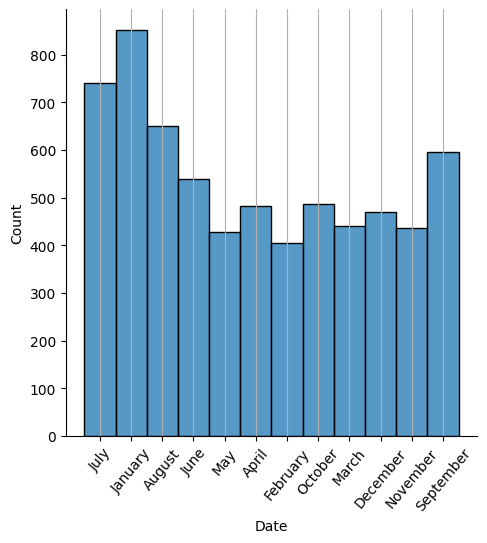

In [30]:
fig = sns.displot(data = df, x = df['Date'].dt.month_name())
plt.xticks(rotation = 50)
plt.grid(axis='x')

<p>Dias da semana que mais ocorreram ataques: Domingo, Sábado e Segunda </p>

In [31]:
df['Date'].dt.day_name().value_counts()

Sunday       1174
Saturday     1162
Monday        845
Wednesday     842
Tuesday       839
Thursday      837
Friday        830
Name: Date, dtype: int64

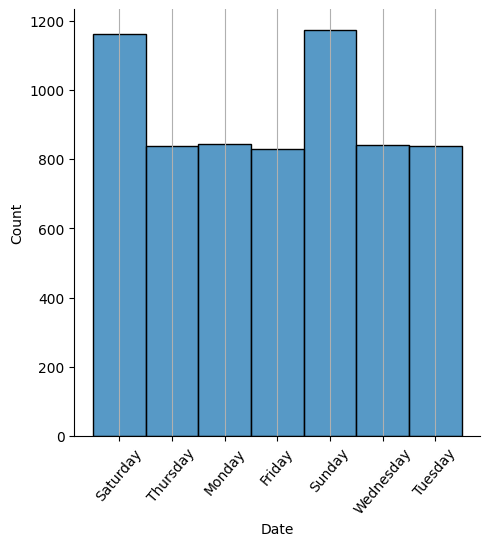

In [32]:
fig = sns.displot(data = df, x = df['Date'].dt.day_name())
plt.xticks(rotation = 50)
plt.grid(axis='x')

<p>Atividade mais presente: Surfando, nadando e pescando</p>

In [33]:
df['Activity'].value_counts()

Surfing                                                                                 1100
Swimming                                                                                 990
Fishing                                                                                  497
Spearfishing                                                                             380
Wading                                                                                   168
                                                                                        ... 
Inebriated, woke from sleep and fell off deck into the water                               1
Swimming to shore from capsized sailboat                                                   1
Tzenny Chandris, a Greek freighter laden with scrap iron, foundered in heavy weather       1
male                                                                                       1
Free diving for sponges                                               

<p>Idade mínima das vítimas: 2 meses     e        Idade máxima das vítimas: 87      e     Média das idades das vítimas: 24 </p>

In [34]:
df['Age'].median()

24.0

In [35]:
df['Age'].unique()

array([40, 42, 12, 9, 10, 26, 38, nan, 54, 17, 22, 55, 29, 14, 30, 69, 20,
       11, 35, 23, 59, 31, 18, 15, 44, '20', 24, 32, 6, 39, 50, 21, 66,
       52, 48, 33, 28, 8, 46, 45, 47, 73, 27, 5, 25, 13, 7, 19, 36, 62,
       49, 'nan', '50', 53, 57, 16, 43, 58, 71, 60, 37, 61, '2', 64, 56,
       34, 41, '1', 51, 87, 65, '60', 68, 75, 63, 3, 67, 70, 1, '30',
       '0.75', '32', 77, '8', '40', 72, '11', '13', '6', '35', 78, 74, 86,
       '0.3', '33', '23', 82, '15', 4, '17', '9', '10', '19', '26', 84,
       81], dtype=object)

<p>5 países que mais sofrem ataques: USA(2494), Australia(1460), south africa(594), nova zelandia(143)</p>

In [36]:
paises = df['Country'].value_counts()
print(paises)

USA                          2494
AUSTRALIA                    1460
SOUTH AFRICA                  594
NEW ZEALAND                   143
PAPUA NEW GUINEA              136
                             ... 
JORDAN                          1
SOLOMON ISLANDS / VANUATU       1
GABON                           1
BRITISH WEST INDIES             1
BAHREIN                         1
Name: Country, Length: 204, dtype: int64


<h2>Análise Brasil: </h2>

In [37]:
brasil = ["BRAZIL"]

In [38]:
filtro_brasil = df['Country'].isin(brasil)

In [39]:
df[filtro_brasil].head(5)

,Date,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source
74,2006-05-21,Unprovoked,BRAZIL,Pernambuco,"Boa Viagem Beach, Recife",Surfing,Rogério Antônio de Carvalho,M,33,"Injuries to left thigh, calf & foot",N,11h30,NaN,"Avisa Nordland, 5/22/2006"
104,1998-07-26,Unprovoked,BRAZIL,Pernambuco,"Boa Viagem, Recife",Surfing,Rodrigo Rocha Menezes,M,NaN,Lacerations to left foot,N,17h30,NaN,JCOnline
108,1997-07-17,Unprovoked,BRAZIL,Pernambuco,"Boa Viagem, Recife",Surfing,José Roberto Paraizo de Albuquerque,M,NaN,Survived,N,NaN,NaN,JCOnline
109,1997-07-02,Unprovoked,BRAZIL,Pernambuco,Paiva,Surfing,Jurandir Amorim Silva,NaN,NaN,Right thigh bitten,N,NaN,NaN,"D. Duarte; Globo, 7/2/1997"
216,1884-04-28,Unprovoked,BRAZIL,NaN,Bahia,Fell overboard from the steamship Chala,,M,NaN,FATAL,Y,NaN,NaN,"Pittsburgh Post Gazette, 4/28/1884"


In [40]:
df[filtro_brasil].shape

(119, 14)

In [41]:
df.loc[filtro_brasil, "Fatal"].value_counts()

N          69
Y          39
UNKNOWN    11
Name: Fatal, dtype: int64

In [42]:
df.loc[filtro_brasil, "Area"].value_counts()

Pernambuco              77
Rio de Janeiro          11
Maranhão                 5
Bahia                    3
Fernando de Noronha      3
Rio Grande de Norte      2
Alagoas                  2
São Paulo.               2
Porto Seguro             1
Paraiba                  1
Boi Island, Victoria     1
Santa Catarina State     1
Rio Grande Do Sul        1
Balneário Camboriú       1
Name: Area, dtype: int64

In [43]:
df.loc[filtro_brasil, "Type"].value_counts()

Unprovoked      98
Invalid         10
Provoked         6
Sea Disaster     5
Name: Type, dtype: int64

In [44]:
df.loc[filtro_brasil, "Date"].dt.month_name().value_counts()

July         15
April        13
March        13
June         12
January      11
October      10
December      9
February      9
May           8
September     8
November      5
August        4
Name: Date, dtype: int64

In [45]:
df.loc[filtro_brasil, "Species"].value_counts()

SHARK INVOLVEMENT NOT CONFIRMED                    10
BULL SHARK                                          4
BULL OR TIGER SHARK                                 3
TIGER SHARK, 1.5 M                                  2
LEMON SHARK PUP                                     2
SANDTIGER SHARK                                     2
TIGER SHARK                                         2
2 M SHARK                                           2
WHITE SHARK                                         1
170-KG, 2.8 M SHARK                                 1
2.27 M SHARK                                        1
LEMON SHARK                                         1
THOUGHT TO INVOLVE A JUVENILE HAMMERHEAD SHARK      1
POSSIBLY A BULL SHARK OR TIGER SHARK                1
DOGFISH                                             1
TIGER SHARK, 2.5 M [8.25']                          1
THOUGH TO INVOLVE A WHITE SHARK                     1
3.7M  TO 4.2 M WHITE SHARK                          1
1.3 TO 1.6 M SHARK          

<h2> Analise USA: </h2>

In [46]:
usa = ["USA"]

In [47]:
filtro_usa = df['Country'].isin(usa)

In [48]:
df[filtro_usa].head(5)

,Date,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source
0,2022-07-16,Unprovoked,USA,Florida,"Daytona Beach Shores, Volusia County",NaN,Tasa Summers,F,40,Minor lacerations to left calf,N,13h12,A SMALL SHARK,"WESH, 717,2022"
1,2022-01-06,Unprovoked,USA,Florida,"Anna Maria Island, Manatee County",Wing Foil Surfing,Erika Lane,F,42,Punctures to leg,N,14h45,BLACKTIP OR SPINNER SHARK,ABC.net
2,2021-08-02,Unprovoked,USA,Maryland,"Ocean City, Worcester County",Swimming,Jordan Prushinski,F,12,Lacerations and puncture wounds to lower left leg,N,15h00,BLACKTIP SHARK,J. Marchand. GSAF
3,2021-07-10,Unprovoked,USA,Florida,"Bathtub Beach, Martin County",Playing,Amiya Lobb-Smith,F,9,Right foot bitten,N,16h39,"SPINNER SHARK, 4'?","J. Marchand, GSAF"
5,2021-05-23,Unprovoked,USA,South Carolina,"Burkes Beach, Hilton Head, Beaufort County",Swimming,Wyatt Bowman,M,26,Minor injuries to foot and ankle,N,NaN,5' SHARK,"K. McMurray, TrackingSharks.com"


In [49]:
df[filtro_usa].shape

(2494, 14)

In [50]:
df.loc[filtro_usa, "Fatal"].value_counts()

N          2084
UNKNOWN     214
Y           196
Name: Fatal, dtype: int64

In [51]:
df.loc[filtro_usa, "Area"].value_counts()

Florida                     1157
Hawaii                       332
California                   324
South Carolina               169
North Carolina               120
Texas                         77
New Jersey                    56
New York                      42
Oregon                        31
Virginia                      19
Massachusetts                 18
Louisiana                     17
Georgia                       17
Puerto Rico                   17
Alabama                       17
Maryland                       9
Mississippi                    8
Delaware                       8
Rhode Island                   8
Connecticut                    6
US Virgin Islands              5
Maui                           3
Maine                          2
Palmyra Atoll                  2
Guam                           2
East coast                     2
Washington                     2
Cayman Islands                 1
CUBA                           1
Illinois                       1
Carolina c

In [52]:
df.loc[filtro_usa, "Type"].value_counts()

Unprovoked      1933
Provoked         229
Invalid          207
Watercraft        82
Sea Disaster      35
Name: Type, dtype: int64

In [53]:
df.loc[filtro_usa, "Date"].dt.month_name().value_counts()

July         410
August       364
September    325
June         271
October      229
April        175
May          169
November     127
January      119
March        113
December      73
February      66
Name: Date, dtype: int64

In [54]:
df.loc[filtro_usa, "Species"].value_counts()

SHARK INVOLVEMENT NOT CONFIRMED    157
WHITE SHARK                         58
4' SHARK                            40
TIGER SHARK                         30
4' TO 5' SHARK                      25
                                  ... 
4' SPINNER SHARK                     1
2.5 M [8.25'] WHITE SHARK            1
6' TO 7' BLACKTIP SHARK              1
>6 M [20'] WHITE SHARK               1
250-LB DOG SHARK                     1
Name: Species, Length: 630, dtype: int64

<h2>Análise Austrália:</h2>

In [55]:
australia = ["AUSTRALIA"]

In [56]:
filtro_australia = df['Country'].isin(australia)

In [57]:
df[filtro_australia].head(5)

,Date,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source
4,2021-06-11,Unprovoked,AUSTRALIA,Western Australia,Five Fingers Reef,Snorkeling,Jackson Bartlett,M,10,Foot bitten,N,11h00,"BRONZE WHALER SHARK, 2 M","B. Myatt, GSAF"
8,2021-01-13,Unprovoked,AUSTRALIA,Western Australia,Blackwall Reach,Swimming,Cameron Wrathall,M,54,Severe injury to leg and broken him,N,07h58,"BULL SHARK, 6.5 TO 10 '","B. Myatt, GSAF & K. McMurray, TrackingSharks.com"
14,2018-10-08,Provoked,AUSTRALIA,Queensland,Swain Reef,Fishing,Ian Hanson,M,55,Injury to upper left arm by hooked shark PROVO...,N,Afternoon,REEF SHARK,"K. McMurray, Tracking Sharks.com"
17,2018-05-09,Invalid,AUSTRALIA,New South Wales,"Sharpes Beach, Ballina",Surfing,,M,NaN,"No injury, surfboard damaged",N,10h30,SHARK INVOLVEMENT NOT CONFIRMED,"B. Myatt, GSAF"
19,2018-03-09,Unprovoked,AUSTRALIA,Victoria,Lorne,Swimming,Rob Crossland,M,69,"No injury, said to have been charged by sharks...",N,15h30,3.5 M SHARK,"B. Myatt, GSAF"


In [58]:
df[filtro_australia].shape

(1460, 14)

In [59]:
df.loc[filtro_australia, "Fatal"].value_counts()

N          1021
Y           299
UNKNOWN     140
Name: Fatal, dtype: int64

In [60]:
df['Area'].replace("Westerm Australia", "Western Australia", inplace=True)
df['Area'].replace("Western  Australia", "Western Australia", inplace=True)

In [61]:
df.loc[filtro_australia, "Area"].value_counts()

New South Wales                         522
Queensland                              346
Western Australia                       225
South Australia                         109
Victoria                                 98
Torres Strait                            72
Tasmania                                 44
Northern Territory                       27
Territory of Cocos (Keeling) Islands      1
Norfolk Island                            1
Name: Area, dtype: int64

In [62]:
df.loc[filtro_australia, "Type"].value_counts()

Unprovoked      1033
Provoked         145
Watercraft       129
Invalid          127
Sea Disaster      24
Name: Type, dtype: int64

In [63]:
df.loc[filtro_australia, "Date"].dt.month_name().value_counts()

January      259
December     193
February     158
November     144
March        131
April        114
October      105
June          70
September     65
May           64
July          58
August        56
Name: Date, dtype: int64

In [64]:
df.loc[filtro_australia, "Species"].value_counts()

SHARK INVOLVEMENT NOT CONFIRMED    86
WHITE SHARK                        51
WOBBEGONG SHARK                    24
BULL SHARK                         19
A SMALL SHARK                      12
                                   ..
BLUE WHALER (GALEOLAMNA)            1
TIGER SHARK, 2.5 M                  1
TIGER SHARK, 2M TO 3M               1
DUSKY SHARK, 2M                     1
TIGER SHARK, 7'                     1
Name: Species, Length: 436, dtype: int64

<h2>Análise África do Sul:</h2>

In [65]:
africasul = ["SOUTH AFRICA"]

In [66]:
filtro_africasul = df['Country'].isin(africasul)

In [67]:
df[filtro_africasul].head(5)

,Date,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source
6,2021-04-14,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Mdloti,Spearfishing,Jarid Norman,M,38,Minor injury to head,N,Afternoon,1.3M SHARK,"M. Michelson, GSAFand K. McMurray, TrackingSha..."
21,2017-04-29,Unprovoked,SOUTH AFRICA,Western Cape Province,"Keurbooms, Plettenberg Bay",Surfing,,M,14,Minor injury to right calf,N,17h10,NaN,"J. de Villiars, News24, 4/29/2017"
33,2015-01-03,Unprovoked,SOUTH AFRICA,Eastern Cape Province,Chintsa East Beach,Surfing,Jason Krafft,M,15,"Lacerations to lower left leg, puncture wounds...",N,08h00,"RAGGEDTOOTH SHARK, 1.3 M","Dispatch Online, 1/7/2015"
58,2008-12-10,Provoked,SOUTH AFRICA,Western Cape Province,Plettenberg Bay,Fishing,Luke Parker,M,15,"Lacerations to knees, thigh and hip by hooked ...",N,20h00,"RAGGEDTOOTH SHARK, 2M","The Herald, 12/12/2008"
81,2004-10-30,Unprovoked,SOUTH AFRICA,Western Cape Province,Gansbaai,Chumming for white sharks,Andre Hartman,M,52,Right ankle & foot lacerated,N,Morning,2 M [6.75'] WHITE SHARK,"J.P. Botha, GSAF"


In [68]:
df[filtro_africasul].shape

(594, 14)

In [69]:
df.loc[filtro_africasul, "Fatal"].value_counts()

N          419
Y          109
UNKNOWN     66
Name: Fatal, dtype: int64

In [70]:
df.loc[filtro_africasul, "Area"].value_counts()

KwaZulu-Natal                                          218
Western Cape Province                                  198
Eastern Cape Province                                  166
Western Province                                         1
Eastern Cape  Province                                   1
Transvaal                                                1
Eastern Province                                         1
KwaZulu-Natal between Port Edward and Port St Johns      1
KZN                                                      1
South Atlantic Ocean                                     1
Name: Area, dtype: int64

In [71]:
df.loc[filtro_africasul, "Type"].value_counts()

Unprovoked      412
Invalid          65
Provoked         56
Watercraft       55
Sea Disaster      5
Name: Type, dtype: int64

In [72]:
df.loc[filtro_africasul, "Date"].dt.month_name().value_counts()

January      128
December      69
February      56
March         53
April         51
July          38
May           38
November      37
October       30
June          29
August        25
September     24
Name: Date, dtype: int64

In [73]:
df.loc[filtro_africasul, "Species"].value_counts()

SHARK INVOLVEMENT NOT CONFIRMED                                                                     46
WHITE SHARK                                                                                         41
RAGGEDTOOTH SHARK                                                                                   14
QUESTIONABLE INCIDENT                                                                               11
TIGER SHARK                                                                                          5
                                                                                                    ..
1.5 TO 2.5 M [5' TO 8.25'] COPPER SHARK                                                              1
POSSIBLY A WHITE SHARK                                                                               1
2 M [6.75'] SHARK                                                                                    1
2 M [6'9] ZAMBESI SHARK                                                  

<h2>Análise Nova Zelândia:</h2>

In [74]:
nz = ["NEW ZEALAND"]

In [75]:
filtro_nz = df['Country'].isin(nz)

In [76]:
df[filtro_nz].head(5)

,Date,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source
57,2008-12-14,Unprovoked,NEW ZEALAND,North Island,Maraetai,Fishing,Ken Lindberg,M,NaN,Lacerations to left calf and ankle,N,NaN,BRONZE WHALER SHARK?,"R.D. Weeks, GSAF"
70,2006-12-11,Unprovoked,NEW ZEALAND,North Island,"Raglan, Manu Bay",Surfing,Elliot Paerata-Reid,M,10,Foot bitten,N,11h00,2 TO 3 M SHARK,"R.D. Weeks, GSAF"
95,2000-12-01,Unprovoked,NEW ZEALAND,Cook Islands,"Arorangi, Rarotonga",Surfing,,F,NaN,FATAL,Y,NaN,NaN,"C. Tini, R.D. Weeks, GSAF"
196,1932-12-09,Provoked,NEW ZEALAND,North Island,Mahurangi River Mouth,Fishing,Mr. L. E. Brasting,M,NaN,Laceration to hand PROVOKED INCIDENT,N,NaN,NaN,"New Zealand Herald, 12/9/1932"
229,NaT,Unprovoked,NEW ZEALAND,North Island,Wellington Harbor,Swimming,"Johnny Balmer, a soldier from the 65th Regiment",M,NaN,"FATAL, posterior thigh bared to femur, kneecap...",Y,NaN,SAID TO INVOLVE A 6 M TO 7.3 M [20' TO 24'] SHARK,"Ref: H. Blake, Sixty Years in New Zealand, pp...."


In [77]:
df[filtro_nz].shape

(143, 14)

In [78]:
df.loc[filtro_nz, "Fatal"].value_counts()

N          105
Y           25
UNKNOWN     13
Name: Fatal, dtype: int64

In [79]:
df.loc[filtro_nz, "Area"].value_counts()

North Island                                    75
South Island                                    44
Cook Islands                                     4
Southland                                        4
Chatham Islands                                  3
South Island, near Karitane north of Dunedin     1
South Island?                                    1
Off the Coromandel Peninsula, North Island       1
Northlands                                       1
Cook Strait                                      1
Chatham Islands, east of New  Zealand            1
Foveaux Strait                                   1
Mercury Islands                                  1
Antarctic Ocean                                  1
Cook islans                                      1
Name: Area, dtype: int64

In [80]:
df.loc[filtro_nz, "Type"].value_counts()

Unprovoked    92
Provoked      21
Watercraft    17
Invalid       13
Name: Type, dtype: int64

In [81]:
df.loc[filtro_nz, "Date"].dt.month_name().value_counts()

January      39
December     24
February     24
March        20
April        10
November      5
October       4
June          3
May           3
September     2
July          2
August        1
Name: Date, dtype: int64

In [82]:
df.loc[filtro_nz, "Species"].value_counts()

SHARK INVOLVEMENT NOT CONFIRMED    7
WHITE SHARK                        5
SEVENGILL SHARK                    4
1.8 M [6'] SHARK                   3
BRONZE WHALER SHARK                2
                                  ..
4' TO 5' SHARK                     1
SAND SHARK                         1
BRONZE WHALER SHARK,4 M [13']      1
2 TO 3 M SHARK                     1
6' SHARK                           1
Name: Species, Length: 72, dtype: int64

<h2>Análise Tubarão Branco </h2>

In [83]:
filtro_tbranco = df['Species'].str.contains('WHITE', na=False)

In [84]:
df.loc[filtro_tbranco, 'Species']

20                    JUVENILE WHITE SHARK,  2.7 TO 3.2 M
34                                  WHITE SHARK, 4 TO 5 M
36                                            WHITE SHARK
39                                WHITE SHARK, 12' TO 14'
48                                       WHITE SHARK, 10'
                              ...                        
6720                                      4 M WHITE SHARK
6737    3.5 M [11.5'], 510-KG [1125-LB] HOOKED & SHOT ...
6773              SAID TO INVOLVE A 7 M [23'] WHITE SHARK
6783                            WHITE SHARK, 4.2 M [13'9]
6808    WHITE SHARK, 12', IDENTITY CONFIRMED BY TOOTH ...
Name: Species, Length: 729, dtype: object

In [85]:
df[filtro_tbranco].head(5)

,Date,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source
20,2018-02-23,Unprovoked,AUSTRALIA,New South Wales,"Little Congwong Beach, La Perouse",Swimming,Anna Shurapey,F,55,Laceratons to right leg & foot,N,"19h00, Dusk","JUVENILE WHITE SHARK, 2.7 TO 3.2 M","B. Myatt, GSAF"
34,2014-12-29,Unprovoked,AUSTRALIA,Western Australia,Three Stripes near Cheynes Beach,Spearfishing,Jay Muscat,M,17,FATAL,Y,Morning,"WHITE SHARK, 4 TO 5 M","The West Australian, 12/29/2014"
36,2014-11-19,Watercraft,AUSTRALIA,Western Australia,Freo,Fishing,Boat: occupants: David Lock & his father,M,NaN,"Shark chasing fish bumped boat, no injury to o...",N,NaN,WHITE SHARK,"The West Australian, 11/20/2014"
39,2014-09-03,Watercraft,USA,Massachusetts,"Manomet Point, Plymouth, Plymouth County",Kayaking,Ida Parker & Kristen Orr,F,20,"No injury, shark bit kayak",N,18h00,"WHITE SHARK, 12' TO 14'","Boston Globe, 9/4/2014"
48,2011-10-22,Unprovoked,AUSTRALIA,Western Australia,Rottnest Island,Diving,George Wainwright,M,32,FATAL,Y,13h25,"WHITE SHARK, 10'","Sky News, 10/22/2011"


In [86]:
df[filtro_tbranco].shape

(729, 14)

In [87]:
df.loc[filtro_tbranco, 'Country'].value_counts()

USA                     231
AUSTRALIA               179
SOUTH AFRICA            171
ITALY                    26
NEW ZEALAND              21
EGYPT                    16
CROATIA                  11
CHILE                     6
GREECE                    5
JAPAN                     4
BRAZIL                    4
CANADA                    3
SOUTH KOREA               3
FRANCE                    3
MEXICO                    3
MALTA                     3
OKINAWA                   3
SPAIN                     2
PANAMA                    2
BAHAMAS                   2
NORTH PACIFIC OCEAN       2
EL SALVADOR               2
RUSSIA                    1
FIJI                      1
NEW CALEDONIA             1
ATLANTIC OCEAN            1
SOUTH ATLANTIC OCEAN      1
CARIBBEAN SEA             1
SLOVENIA                  1
UNITED KINGDOM            1
EGYPT / ISRAEL            1
ARGENTINA                 1
RED SEA                   1
REUNION                   1
NORTH ATLANTIC OCEAN      1
AZORES              

In [88]:
df.loc[filtro_tbranco, 'Date'].dt.month_name().value_counts()

September    90
July         79
January      73
August       71
October      65
December     59
November     56
June         51
February     47
April        39
March        37
May          37
Name: Date, dtype: int64

In [89]:
df.loc[filtro_tbranco, 'Fatal'].value_counts()

N          548
Y          163
UNKNOWN     18
Name: Fatal, dtype: int64

In [90]:
df.loc[filtro_tbranco, 'Type'].value_counts()

Unprovoked      553
Watercraft      133
Provoked         29
Invalid           8
Sea Disaster      6
Name: Type, dtype: int64

<h2> Análise Tubarão Tigre: </h2>

In [91]:
filtro_ttigre = df['Species'].str.contains('TIGER', na=False)

In [92]:
df[filtro_ttigre].head(5)

,Date,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source
18,2018-04-28,Unprovoked,COSTA RICA,Cocos Island,Manuelita,Scuba diving,,M,30,"No injury, shark bit scuba gear",N,10h40,TIGER SHARK,Costa Rica Star. 4/28/2018
44,2013-08-14,Unprovoked,USA,Hawaii,"Makenat, Maui",Snorkeling,Jana Lutteropp,F,20,FATAL,Y,16h30,TIGER SHARK?,"KHON2, 8/15/2013"
62,2008-08-11,Unprovoked,USA,Hawaii,"Ala Moana Beach Park, Oah'u",Diving,,M,NaN,"No injury, shark grabbed his bag of fish",N,14h00,"TIGER SHARK, 12'","Honolulu Advertiser, 8/13/2008"
65,2007-12-10,Unprovoked,USA,Hawaii,"Waialua Bay, O'ahu",Surfing,Valentino Ramirez,M,52,"No injury, shark bit surfboard",N,Just before 11h00,TIGER SHARK,"Honolulu Advertiser, 12/12/2007"
78,2005-05-14,Watercraft,USA,Hawaii,"North Kihei, Maui",Kayaking,J. Bailey,NaN,NaN,"No injury, shark bit kayak",N,11h00,"TIGER SHARK, 8' TO 9'",Hawaii Department of Land and Natural Resources


In [93]:
df[filtro_ttigre].shape

(321, 14)

In [94]:
df.loc[filtro_ttigre, 'Country'].value_counts()

USA                               139
AUSTRALIA                          61
NEW CALEDONIA                      13
BRAZIL                             12
SOUTH AFRICA                       12
FIJI                               10
MEXICO                              8
REUNION                             6
BAHAMAS                             6
PAPUA NEW GUINEA                    6
COSTA RICA                          3
SOUTH ATLANTIC OCEAN                3
EGYPT                               3
HONG KONG                           3
PALAU                               2
SOUTHWEST PACIFIC OCEAN             2
REUNION ISLAND                      2
UNITED KINGDOM                      2
JAMAICA                             2
TONGA                               2
CARIBBEAN SEA                       1
NEW ZEALAND                         1
MAYOTTE                             1
AMERICAN SAMOA                      1
CURACAO                             1
BELIZE                              1
SEYCHELLES  

In [95]:
df.loc[filtro_ttigre, 'Date'].dt.month_name().value_counts()

December     35
January      34
November     32
April        30
October      29
July         28
March        23
September    22
June         21
August       20
May          20
February     18
Name: Date, dtype: int64

In [96]:
df.loc[filtro_ttigre, 'Fatal'].value_counts()

N          235
Y           82
UNKNOWN      4
Name: Fatal, dtype: int64

In [97]:
df.loc[filtro_ttigre, 'Type'].value_counts()

Unprovoked      267
Provoked         25
Sea Disaster     12
Watercraft       11
Invalid           5
Name: Type, dtype: int64

<h2>Análise Tubarão Touro: </h2>

In [98]:
filtro_ttouro = df['Species'].str.contains('BULL', na=False)

In [99]:
df[filtro_ttouro].head(5)

,Date,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source
8,2021-01-13,Unprovoked,AUSTRALIA,Western Australia,Blackwall Reach,Swimming,Cameron Wrathall,M,54,Severe injury to leg and broken him,N,07h58,"BULL SHARK, 6.5 TO 10 '","B. Myatt, GSAF & K. McMurray, TrackingSharks.com"
24,2016-08-27,Unprovoked,REUNION,NaN,Boucan Canot,Surfing,Laurent Chardard,M,20,"Right arm severed, ankle severely bitten",N,17h00,"BULL SHARK, 3.5 M","LaDepeche, 8/29/2016"
31,2015-06-27,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",Swimming,John Cole,M,18,"Injuries to right calf, buttock and both hands",N,16h00,BULL SHARK,"C. Creswell, WRAL, 6/27/2015"
85,2003-01-03,Unprovoked,COSTA RICA,North Pacific coast,Playa Tamarindo,Surfing,Ross Menking,M,NaN,Lower right leg lacerated,N,NaN,"BULL SHARK, 7'",A.M. Costa Rica
99,2000-06-09,Unprovoked,USA,Alabama,"Gulf Shores, Baldwin County",Swimming,Chuck Anderson,M,44,Right forearm severed surgically amputated abo...,N,06h45,BULL SHARK,"Orlando Sentinel, 6/10/2000, p.A20 & 6/11/2000..."


In [100]:
df.loc[filtro_ttouro, 'Country'].value_counts()

USA                     84
AUSTRALIA               42
REUNION                 17
BAHAMAS                 16
BRAZIL                   9
IRAN                     9
NEW CALEDONIA            7
IRAQ                     5
THAILAND                 3
CUBA                     3
SOUTH AFRICA             3
COSTA RICA               3
NICARAGUA                3
INDONESIA                3
VENEZUELA                2
MEXICO                   2
MAURITIUS                1
TONGA                    1
SEYCHELLES               1
NETHERLANDS ANTILLES     1
SOUTH ATLANTIC OCEAN     1
Name: Country, dtype: int64

In [101]:
df.loc[filtro_tbranco, 'Date'].dt.month_name().value_counts()

September    90
July         79
January      73
August       71
October      65
December     59
November     56
June         51
February     47
April        39
March        37
May          37
Name: Date, dtype: int64

In [102]:
df.loc[filtro_ttouro, 'Fatal'].value_counts()

N          171
Y           43
UNKNOWN      2
Name: Fatal, dtype: int64

In [103]:
df.loc[filtro_ttouro, 'Type'].value_counts()

Unprovoked      199
Provoked         10
Watercraft        3
Sea Disaster      2
Invalid           1
Name: Type, dtype: int64

<h2> Análise Tubarão Mako: </h2>

In [104]:
filtro_tmako = df['Species'].str.contains('MAKO', na=False)

In [105]:
df[filtro_tmako].head(5)

,Date,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source
27,2016-06-04,Unprovoked,EGYPT,Suez,Ain Sokhna,Swimming,Omar Abdel Qader,M,23,"Leg severely bitten, surgically amputated",N,Morning,MAKO SHARK,"Ahram Online, 6/4/2016"
30,2015-07-23,Provoked,USA,California,"La Jolla, San Diego County",Kayak Fishing,Austin Lorber,M,31,No injury to occupant. Kayak bitten by gaffed ...,N,NaN,"MAKO SHARK, 100-LB","NBC San Diego, 7/27/2015"
166,1957-09-02,Unprovoked,MARSHALL ISLANDS,Eniwetok Atoll,Parry Island,NaN,Walter L. Huges,M,NaN,Survived,N,NaN,IDENTIFIED AS CARCHARINID SHARK (BASED ON ITS ...,"V.M. Coppleson (1962), p.248"
536,2008-01-27,Provoked,AUSTRALIA,Queensland,200 km east of Coolangatta,Accidentally stood on hooked shark's tail befo...,Jarryd Tinson,M,20,Laceration to left knee PROVOKED INCIDENT,N,07h30,"MAKO SHARK, 90KG",News.com.au
610,1969-03-25,Provoked,AUSTRALIA,New South Wales,Newcastle,NaN,William Hill,M,65,Foot lacerated. Recorded as PROVOKED INCIDENT,N,NaN,MAKO SHARK,H.D.Baldridge (1994) SAF Case #1612


In [106]:
df.loc[filtro_tmako, 'Country'].value_counts()

USA                     18
AUSTRALIA                9
NEW ZEALAND              8
SOUTH AFRICA             7
EGYPT                    5
MARSHALL ISLANDS         1
ISRAEL                   1
UNITED ARAB EMIRATES     1
REUNION                  1
TAIWAN                   1
ENGLAND                  1
VENEZUELA                1
BAHAMAS                  1
FRANCE                   1
JAPAN                    1
Name: Country, dtype: int64

In [107]:
df.loc[filtro_tmako, 'Date'].dt.month_name().value_counts()

July         8
March        7
January      6
December     6
February     6
June         5
May          5
September    4
April        4
October      2
November     2
August       2
Name: Date, dtype: int64

In [108]:
df.loc[filtro_tmako, 'Fatal'].value_counts()

N    55
Y     3
Name: Fatal, dtype: int64

In [109]:
df.loc[filtro_tmako, 'Type'].value_counts()

Unprovoked    27
Provoked      15
Watercraft    15
Invalid        1
Name: Type, dtype: int64

<p>5 espécies que mais atacam: Tubarão branco, tubarão trige, tubarão touro </p>

In [110]:
df['Species'].value_counts()

SHARK INVOLVEMENT NOT CONFIRMED                                                                     410
WHITE SHARK                                                                                         192
TIGER SHARK                                                                                          88
BULL SHARK                                                                                           67
6' SHARK                                                                                             43
                                                                                                   ... 
SHOVELNOSE SHARK WHICH IS A RAY, NOT A SHARK)                                                         1
WHITE SHARK, 2-TO 3M                                                                                  1
THOUGHT TO INVOLVE A 4' SANDTIGER SHARK                                                               1
WHITE SHARK, 1600-LB FEMALE                                     

<p>Número de ataques totais: 6840</p>
<p>Ataques provocados: 5010     Ataques não-provocados: 628</p>
<p>Ataques Fatais: 1447   Ataques Não-fatais: 4756  </p>
<p>Vítimas homens: 5516           Vítimas mulheres: 753</p>
<p>Meses que mais ocorreram ataques: Janeiro(853), Julho(741), Agosto(650) </p>
<p>Estações que mais ocorreram ataques: Domingo(1174), Sábado(1162), restante varia de 800 </p>
<p>Atividade mais presente:</p>
<p>Idade mínima das vítimas: 2 meses             Idade máxima das vítimas: 87 anos           Média das idades das vítimas: 24 anos</p>
<p>4 países que mais sofrem ataques e Brasil: USA(2494), Australia(1460), south africa(594), nova zelandia(143)  </p>
<p>3 espécies que mais atacam: Branco, tigre, touro  </p>

<h1> Aprendizagem Supervisionada </h1>

In [111]:
df.dropna(inplace=True)

In [115]:
encoder = ce.OrdinalEncoder(cols=['Fatal', 'Type'])
encoder.fit_transform

<bound method TransformerMixin.fit_transform of OrdinalEncoder(cols=['Fatal', 'Type'])>

In [136]:
df.target = df["Fatal"]
df.label


C:\Users\isabe\AppData\Local\Temp\ipykernel_15624\2548335135.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.target = df["Fatal"]


In [138]:
sns.pairplot(df, hue="Type")

ValueError: No variables found for grid columns.